# Eine kurze Geschichte der DCT


### Die Idee

Wir haben ein Signal an $N$ stellen abgetastet und erhalten einen $N$-stelligen Vektor $s$, der unsere Daten darstellt:

$$
    s = (s_0,...,s_{N-1})^T
$$

Die Grundidee besteht nun daraus, eine neue Basis für unseren $N$-dimensionalen Vektorraum zu finden, die so beschaffen ist, dass wir einen überwiegenden Teil der Informationen in unseren Daten mit wesentlich weniger als $N$ Koeffizienten speichern können. Dafür sind zwei Dinge wesentlich: Energie-Kompaktheit und Dekorrelation. Eine Basis, die diese Bedingungen erfüllt, ist eine Familie von Vektoren $b_k$, die so aussehen:

$$
 b_k(n) = \alpha_k \cos \left( \dfrac{(2n-1)k\pi}{2N} \right),
$$
$$
 n=0, 1, ..., N-1
$$
$$
\alpha_0 = \sqrt{\dfrac{1}{N}},\ \ \alpha_k = \sqrt{\dfrac{2}{N}},\ \ k=1,..., N-1
$$

Schauen wir uns diese Basis der Einfachheit halber einmal für $N=8$ an:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

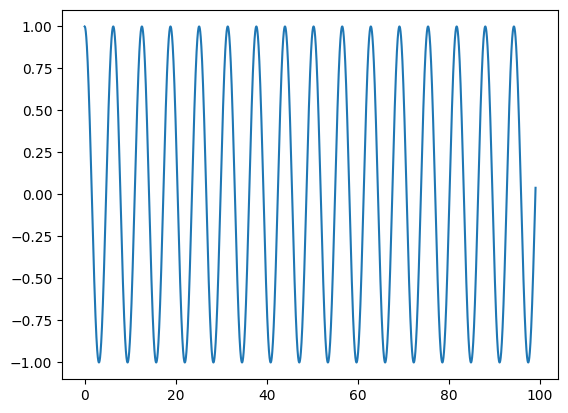

In [3]:
fig, ax = plt.subplots()
x = np.linspace(0,99, 10000)
y = np.cos(x)
ax.plot(x,y)
plt.show()